<a href="https://colab.research.google.com/github/mads5/StockPredictor/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Run the below line before running the code for the first time.


In [72]:
# !pip install yfinance

In [73]:
import yfinance as yf
import pandas_datareader as web
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
days = 90
stock = 'JIOFIN.NS'
end = date.today()
start = '1993-01-01'
#data_source='yahoo'
print(end)

2025-01-15


In [74]:
#Get the stock data
df = yf.download(stock, start=start, end=end)

#df = web.DataReader(stock, data_source, start, end)
#Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JIOFIN.NS,JIOFIN.NS,JIOFIN.NS,JIOFIN.NS,JIOFIN.NS,JIOFIN.NS
Date,,,,,,
2023-08-21,248.899994,248.899994,262.049988,248.899994,262.000000,74715306
2023-08-22,236.449997,236.449997,236.449997,236.449997,236.449997,7281398
2023-08-23,224.649994,224.649994,224.649994,224.649994,224.649994,4289046
2023-08-24,213.449997,213.449997,213.449997,213.449997,213.449997,27673350
2023-08-25,214.500000,214.500000,224.100006,202.800003,202.800003,281040100
...,...,...,...,...,...,...
2025-01-08,298.600006,298.600006,300.850006,296.250000,300.500000,10545440
2025-01-09,289.250000,289.250000,298.500000,288.799988,298.500000,15072300


In [75]:
#Get the number of rows and columns in data set
df.shape

(341, 6)

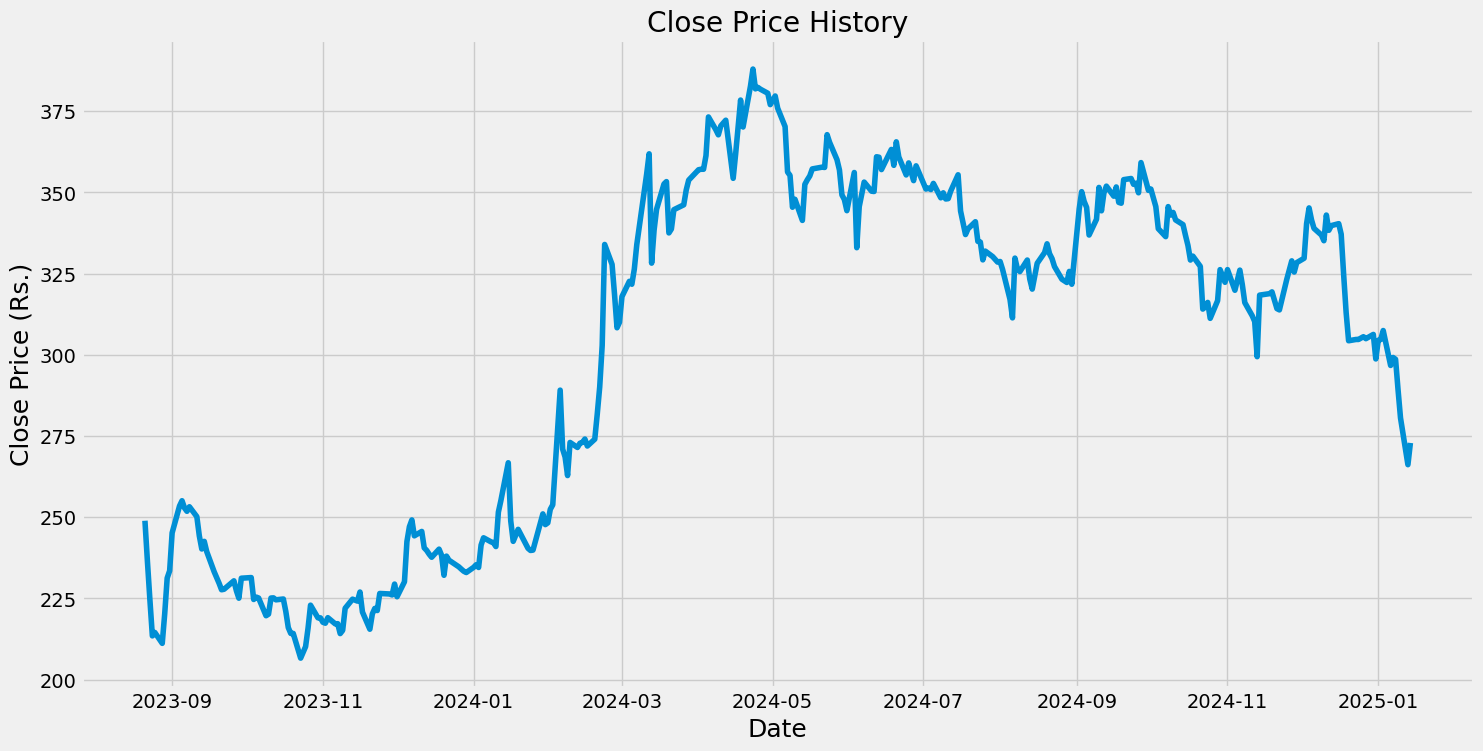

In [76]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs.)', fontsize=18)
plt.show()

In [77]:
#Create a new dataframe with only the 'Close' column
try:
    # If 'Close' column exists (case-sensitive)
    data = df[['Close']]
except KeyError:
    # If 'Close' doesn't exist, find case-insensitive match
    close_col = next((col for col in df.columns if col.lower() == 'close'), None)
    if close_col:
        data = df[[close_col]]
    else:
        raise KeyError("Column 'Close' (case-insensitive) not found in DataFrame")


# data = df.filter(['Close'])
#convert the dataframe to a numpy array
# dataset = data[['Close']].values
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

273

In [78]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.23325055],
       [0.16459879],
       [0.09953122],
       [0.03777221],
       [0.04356214],
       [0.02508954],
       [0.07526878],
       [0.13592497],
       [0.14833192],
       [0.2125723 ],
       [0.25834017],
       [0.26716292],
       [0.2550317 ],
       [0.24924177],
       [0.25696162],
       [0.24014329],
       [0.20760955],
       [0.18527703],
       [0.19823543],
       [0.18086566],
       [0.14667764],
       [0.12710222],
       [0.11607382],
       [0.116901  ],
       [0.12765367],
       [0.13123787],
       [0.11441963],
       [0.10173695],
       [0.13564924],
       [0.13675206],
       [0.09953122],
       [0.10366687],
       [0.10201268],
       [0.07196023],
       [0.07471733],
       [0.10201268],
       [0.10228832],
       [0.09897985],
       [0.1003584 ],
       [0.0791287 ],
       [0.05183344],
       [0.04190786],
       [0.04190786],
       [0.        ],
       [0.01957534],
       [0.05100634],
       [0.08988137],
       [0.068

In [79]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(days, len(train_data)):
  x_train.append(train_data[i-days:i, 0])
  y_train.append(train_data[i, 0])
  if i <= days+1:
    print(x_train)
    print(y_train)
    print()

[array([0.23325055, 0.16459879, 0.09953122, 0.03777221, 0.04356214,
       0.02508954, 0.07526878, 0.13592497, 0.14833192, 0.2125723 ,
       0.25834017, 0.26716292, 0.2550317 , 0.24924177, 0.25696162,
       0.24014329, 0.20760955, 0.18527703, 0.19823543, 0.18086566,
       0.14667764, 0.12710222, 0.11607382, 0.116901  , 0.12765367,
       0.13123787, 0.11441963, 0.10173695, 0.13564924, 0.13675206,
       0.09953122, 0.10366687, 0.10201268, 0.07196023, 0.07471733,
       0.10201268, 0.10228832, 0.09897985, 0.1003584 , 0.0791287 ,
       0.05183344, 0.04190786, 0.04190786, 0.        , 0.01957534,
       0.05100634, 0.08988137, 0.06837603, 0.06837603, 0.06093183,
       0.05927764, 0.06865176, 0.05817473, 0.05845046, 0.04163213,
       0.04714633, 0.0846429 , 0.10008268, 0.09677412, 0.1122139 ,
       0.07830161, 0.04907634, 0.07499305, 0.08436718, 0.08078298,
       0.10973252, 0.10890543, 0.10725115, 0.12572367, 0.10421833,
       0.12958367, 0.19795971, 0.22304933, 0.23462909, 0.2076

In [80]:
#Convert x_trtain and y_train dataset to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [81]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(183, 90, 1)

In [82]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
#compile the model
model.compile(optimizer='adamw', loss='mean_squared_error')

In [84]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

183/183 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - loss: 0.0690


In [85]:
#Create the testing dataset
#Create a new array containing scaled values from index 1576 to 2003
test_data = scaled_data[training_data_len - days:, :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(days, len(test_data)):
  x_test.append(test_data[i-days:i, 0])

In [86]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [87]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(68, 90, 1)

In [88]:
#Get the model to predict values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step


In [89]:
#Get the root mean squares error (RMSE)
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

20.36251072113491

<ipython-input-90-5e7e85a1e3a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


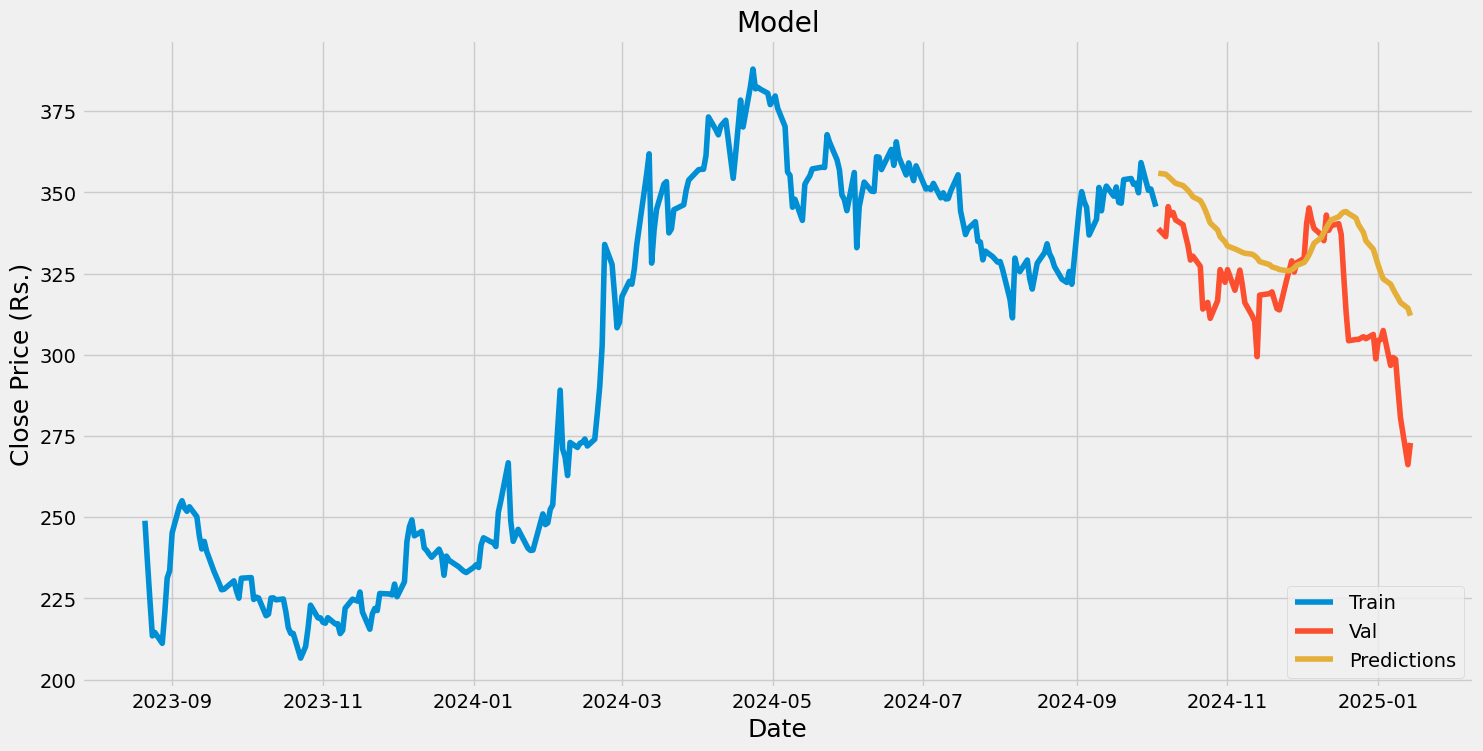

In [90]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs.)', fontsize=18)
#plt.plot(train['Open'])
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [91]:
#Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,JIOFIN.NS,
Date,,
2024-10-04,338.799988,355.877167
2024-10-07,336.350006,355.580719
2024-10-08,345.600006,354.913971
2024-10-09,343.000000,354.214417
2024-10-10,343.799988,353.481110
...,...,...
2025-01-08,298.600006,318.780853
2025-01-09,289.250000,317.481354


In [92]:
#Get the quote
vipind_quote = yf.download(stock, start=start, end=end)
print(vipind_quote.columns)

#Create a new dataframe
new_df = vipind_quote.loc[:, ['Close']]
#Get teh last 60 day closing price
last_60_days = new_df[-days:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'JIOFIN.NS'),
            (    'Close', 'JIOFIN.NS'),
            (     'High', 'JIOFIN.NS'),
            (      'Low', 'JIOFIN.NS'),
            (     'Open', 'JIOFIN.NS'),
            (   'Volume', 'JIOFIN.NS')],
           names=['Price', 'Ticker'])
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[309.4132]]


In [93]:
# #Get the quote
# import json
# import re
# import requests
# import time
# url = f"https://query1.finance.yahoo.com/v8/finance/chart/{stock}?region=IN&lang=en-IN&includePrePost=false&interval=1d&range=5y&corsDomain=in.finance.yahoo.com&.tsrc=finance"

# response = requests.get(url)
# if response.status_code == 200:
#     data = response.json()

#     # Extract the closing prices
#     close_prices = data['chart']['result'][0]['indicators']['quote'][0]['close']

#     # Print the closing prices
#     print(close_prices)
# else:
#     print(f"Error: Request failed with status code {response.status_code}")
#     # Implement a retry mechanism with a delay
#     time.sleep(5)  # Wait for 5 seconds before retrying
#     response = requests.get(url)  # Retry the request
#     if response.status_code == 200:
#         data = response.json()
#         close_prices = data['chart']['result'][0]['indicators']['quote'][0]['close']
#         print(close_prices)
#     else:
#         print(f"Error: Request failed again with status code {response.status_code}")
# # apple_quote2 = web.DataReader(stock, data_source, start, end)
# # print(apple_quote2['Close'])

Error: Request failed with status code 429
Error: Request failed again with status code 429
